<a href="https://colab.research.google.com/github/PariaNajafi/Learning_Computer_Vision/blob/main/Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2024-05-04

In [ ]:
from tensorflow.keras.layers import Conv2D, DepthwiseConv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()
#a block
model.add(Conv2D(filters=16, kernel_size=1, input_shape=(224, 224,3))) #increase depth to 16
model.add(DepthwiseConv2D(kernel_size=3)) # decrease x ,y
model.add(Conv2D(filters=3, kernel_size=1)) # point wise, decreases depth
model.add(MaxPooling2D(pool_size=2, strides=2)) # x, y devided by 2
#a block
model.add(Conv2D(filters=16, kernel_size=1))
model.add(DepthwiseConv2D(kernel_size=3))
model.add(Conv2D(filters=3, kernel_size=1))
model.add(MaxPooling2D(pool_size=2, strides=2))
#a block
model.add(Conv2D(filters=16, kernel_size=1))
model.add(DepthwiseConv2D(kernel_size=3))
model.add(Conv2D(filters=3, kernel_size=1))
model.add(MaxPooling2D(pool_size=2, strides=2))


model.add(Flatten())
# flattens parameters must not be less than dense parameters,
# with 2 additional blocks flattens parameters will be 75, how it can use 75
# feature to classify 1000!
model.add(Dense(1000))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      64        
                                                                 
 depthwise_conv2d (Depthwis  (None, 222, 222, 16)      160       
 eConv2D)                                                        
                                                                 
 conv2d_1 (Conv2D)           (None, 222, 222, 3)       51        
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 3)       0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 111, 111, 16)      64        
                                                                 
 depthwise_conv2d_1 (Depthw  (None, 109, 109, 16)      1

##Functional models

In [ ]:
from tensorflow.keras.layers import Input,concatenate
from tensorflow.keras.models import Model

In [ ]:
input_layer = Input(shape=(224,224,3))
#Block 1
output_layer_1 = Conv2D(16, 1)(input_layer) #point wise
output_layer_2 = DepthwiseConv2D(3, padding='same')(output_layer_1) #depth wise
output_layer_3 = Conv2D(3, 1)(output_layer_2) #point wise

identity = concatenate([input_layer , output_layer_3])
max_pooled = MaxPooling2D(2, 2)(identity)
#Block 2
output_layer_4 = Conv2D(16, 1)(max_pooled) #point wise
output_layer_5 = DepthwiseConv2D(3, padding='same')(output_layer_4) #depth wise
output_layer_6 = Conv2D(3, 1)(output_layer_5) #point wise

identity = concatenate([max_pooled, output_layer_6])

model = Model(input_layer, identity)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_6 (Conv2D)           (None, 224, 224, 16)         64        ['input_1[0][0]']             
                                                                                                  
 depthwise_conv2d_3 (Depthw  (None, 224, 224, 16)         160       ['conv2d_6[0][0]']            
 iseConv2D)                                                                                       
                                                                                                  
 conv2d_7 (Conv2D)           (None, 224, 224, 3)          51        ['depthwise_conv2d_3[0][0]

we must put layers an input.
<br>
sequential model is straight forward,
<br>
then we must code the identity part and then the block is ready!
<br>
summary shows us connections.
<br>
6 layer with 918 parameters!its incredible

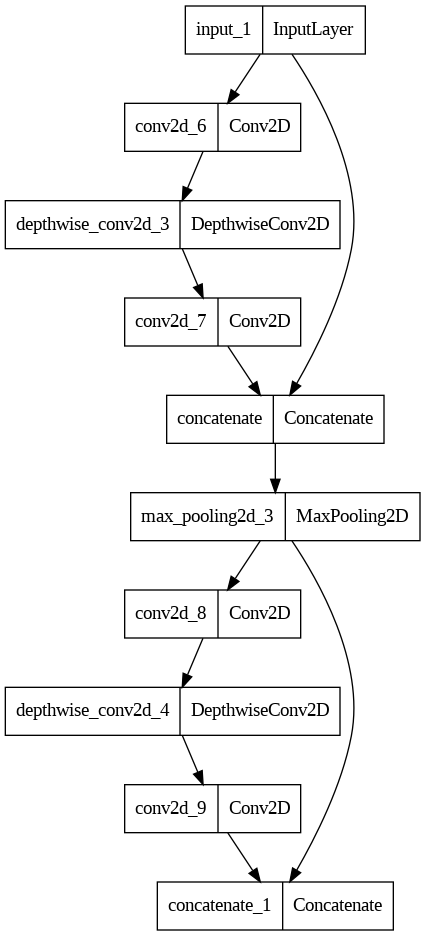

In [ ]:
from keras.utils import plot_model
plot_model(model)

max pooling and not to connecting the start and the beginning with identity,
<br>
are decreasing the size of the image, if bwe concat start to end,
<br>
the size of image remains same and it is not what we want.  
<br>
activation and batchnorm missed.

In [ ]:
from tensorflow.keras.applications import MobileNetV2

In [ ]:
model = MobileNetV2(weights=None)

In [ ]:
plot_model(model)

##Transfer learning

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! unzip /content/drive/MyDrive/Colab\ Notebooks/Cats\&Dogs.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset/training_set/cats/cat.37.jpg  
  inflating: dataset/training_set/cats/cat.370.jpg  
  inflating: dataset/training_set/cats/cat.3700.jpg  
  inflating: dataset/training_set/cats/cat.3701.jpg  
  inflating: dataset/training_set/cats/cat.3702.jpg  
  inflating: dataset/training_set/cats/cat.3703.jpg  
  inflating: dataset/training_set/cats/cat.3704.jpg  
  inflating: dataset/training_set/cats/cat.3705.jpg  
  inflating: dataset/training_set/cats/cat.3706.jpg  
  inflating: dataset/training_set/cats/cat.3707.jpg  
  inflating: dataset/training_set/cats/cat.3708.jpg  
  inflating: dataset/training_set/cats/cat.3709.jpg  
  inflating: dataset/training_set/cats/cat.371.jpg  
  inflating: dataset/training_set/cats/cat.3710.jpg  
  inflating: dataset/training_set/cats/cat.3711.jpg  
  inflating: dataset/training_set/cats/cat.3712.jpg  
  inflating: dataset/training_set/cats/cat.3713.jpg  
  inflating: dataset/training_set/c

A folder is created as dataset out of the drive folder.

In [ ]:
import os
root = '/content/dataset/training_set'

In [ ]:
cats_path = os.path.join(root, 'cats/')
dogs_path = os.path.join(root, 'dogs/')


In [ ]:
cats_path

'/content/dataset/training_set/cats/'

In [ ]:
os.listdir(cats_path)

['cat.1909.jpg',
 'cat.723.jpg',
 'cat.1626.jpg',
 'cat.1802.jpg',
 'cat.674.jpg',
 'cat.1399.jpg',
 'cat.1205.jpg',
 'cat.2415.jpg',
 'cat.3730.jpg',
 'cat.3076.jpg',
 'cat.2549.jpg',
 'cat.2255.jpg',
 'cat.160.jpg',
 'cat.582.jpg',
 'cat.665.jpg',
 'cat.741.jpg',
 'cat.2192.jpg',
 'cat.860.jpg',
 'cat.3805.jpg',
 'cat.2860.jpg',
 'cat.3729.jpg',
 'cat.2403.jpg',
 'cat.1486.jpg',
 'cat.1714.jpg',
 'cat.1632.jpg',
 'cat.1487.jpg',
 'cat.3401.jpg',
 'cat.3194.jpg',
 'cat.3697.jpg',
 'cat.1488.jpg',
 'cat.784.jpg',
 'cat.1369.jpg',
 'cat.567.jpg',
 'cat.427.jpg',
 'cat.382.jpg',
 'cat.2571.jpg',
 'cat.1191.jpg',
 'cat.1938.jpg',
 'cat.2041.jpg',
 'cat.925.jpg',
 'cat.2822.jpg',
 'cat.2424.jpg',
 'cat.2123.jpg',
 'cat.2828.jpg',
 'cat.2540.jpg',
 'cat.1852.jpg',
 'cat.464.jpg',
 'cat.1134.jpg',
 'cat.3231.jpg',
 'cat.3415.jpg',
 'cat.145.jpg',
 'cat.2976.jpg',
 'cat.2111.jpg',
 'cat.2481.jpg',
 'cat.3867.jpg',
 'cat.3825.jpg',
 'cat.364.jpg',
 'cat.2465.jpg',
 'cat.898.jpg',
 'cat.1766.jp

In [ ]:
cats_img_path = []
for name in os.listdir(cats_path):
  cats_img_path.append(os.path.join(cats_path, name))

dogs_img_path = []
for name in os.listdir(dogs_path):
  dogs_img_path.append(os.path.join(dogs_path, name))

In [ ]:
cats_img_path[1], dogs_img_path[1]

('/content/dataset/training_set/cats/cat.723.jpg',
 '/content/dataset/training_set/dogs/dog.2868.jpg')

open cv is translated from c++ and c to python

In [ ]:
# pip install opencv-python  --->for local usage
import cv2


In [ ]:
img =cv2.imread(cats_img_path[1])

array([[[ 39,  45,  40],
        [ 42,  48,  43],
        [ 45,  51,  46],
        ...,
        [132, 128, 104],
        [131, 127, 103],
        [130, 126, 102]],

       [[ 39,  45,  40],
        [ 42,  48,  43],
        [ 45,  51,  46],
        ...,
        [132, 128, 104],
        [131, 127, 103],
        [130, 126, 102]],

       [[ 40,  46,  41],
        [ 42,  48,  43],
        [ 45,  51,  46],
        ...,
        [133, 129, 105],
        [132, 128, 104],
        [131, 127, 103]],

       ...,

       [[ 62,  81,  84],
        [ 62,  81,  84],
        [ 62,  81,  84],
        ...,
        [124, 125, 121],
        [124, 125, 121],
        [124, 125, 121]],

       [[ 61,  80,  83],
        [ 60,  79,  82],
        [ 58,  77,  80],
        ...,
        [132, 133, 129],
        [131, 132, 128],
        [129, 130, 126]],

       [[ 60,  79,  82],
        [ 58,  77,  80],
        [ 56,  75,  78],
        ...,
        [138, 139, 135],
        [136, 137, 133],
        [135, 136, 132]]], dtype=uint8)
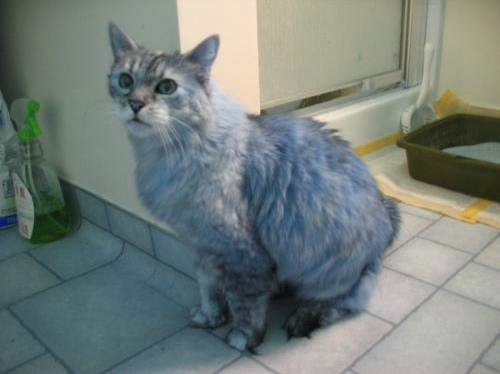

In [ ]:
img

this is colab's feature,attribute , that shows the image with this code
<br>in default it takes a numpy array

In [ ]:
import matplotlib.pyplot as plt

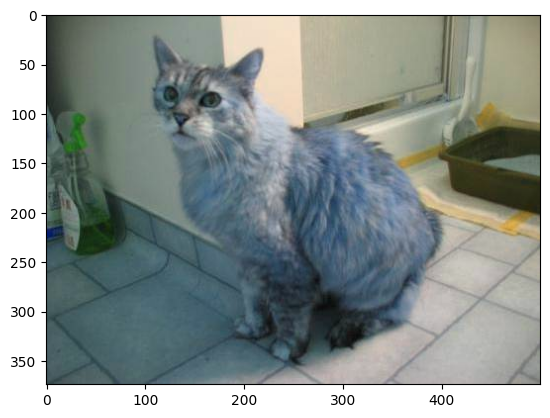

In [ ]:
plt.imshow(img)

In [ ]:
img.shape

(374, 500, 3)

In [ ]:
cat_imgs, dog_imgs = [], []
for img_path in cats_img_path[:2000]:
  img = cv2.imread(img_path)
  img = cv2.resize(img, (224, 224))
  cat_imgs.append(img)

for img_path in dogs_img_path[:2000]:
  img = cv2.imread(img_path)
  img = cv2.resize(img, (224, 224))
  dog_imgs.append(img)

we used 4000 data because of the ram of the colab.

how cv2 resizes the image?with down scaling (not elemination) and upscaling,
it uses interpolation methods

array([[[ 41,  47,  42],
        [ 46,  52,  47],
        [ 48,  55,  48],
        ...,
        [135, 132, 104],
        [133, 129, 105],
        [130, 126, 102]],

       [[ 41,  47,  42],
        [ 46,  52,  47],
        [ 49,  56,  49],
        ...,
        [136, 133, 105],
        [134, 130, 106],
        [132, 128, 103]],

       [[ 42,  48,  43],
        [ 47,  53,  48],
        [ 50,  57,  50],
        ...,
        [137, 134, 106],
        [136, 132, 108],
        [134, 130, 106]],

       ...,

       [[ 66,  85,  88],
        [ 69,  88,  91],
        [ 66,  85,  88],
        ...,
        [124, 125, 121],
        [125, 126, 122],
        [129, 130, 126]],

       [[ 62,  81,  84],
        [ 60,  79,  82],
        [ 57,  76,  79],
        ...,
        [133, 134, 130],
        [124, 125, 121],
        [124, 125, 121]],

       [[ 59,  78,  81],
        [ 54,  73,  76],
        [ 52,  71,  74],
        ...,
        [141, 142, 138],
        [136, 138, 133],
        [134, 135, 131]]], dtype=uint8)
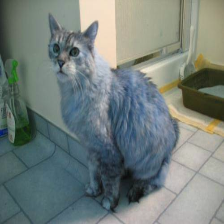

In [ ]:
cat_imgs[1]

In [ ]:
cat_labels = [0 for i in range(len(cat_imgs))]
dog_labels = [1 for i in range(len(dog_imgs))]

In [ ]:
import numpy as np

In [ ]:
x = np.concatenate([cat_imgs, dog_imgs], axis=0)
y = np.concatenate([cat_labels, dog_labels], axis=0)


In [ ]:
len(x), len(y)

(4000, 4000)

change y to categorical and shuffle all

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_categorical = to_categorical(y)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y_categorical, test_size=0.3)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2800, 224, 224, 3), (1200, 224, 224, 3), (2800, 2), (1200, 2))

In [ ]:
x_train = x_train/255.
x_test = x_test/255.

In [ ]:
from tensorflow.keras.applications import ResNet50

make an object of it and use as base_model
<br>dont use its pre train and put weights=None
<br>we will train it ourself

In [ ]:
base_model = ResNet50(weights=None, include_top=False, pooling='avg')

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()
model.add(base_model)
model.add(Dense(2, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense (Dense)               (None, 2)                 4098      
                                                                 
Total params: 23591810 (90.00 MB)
Trainable params: 23538690 (89.79 MB)
Non-trainable params: 53120 (207.50 KB)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss= 'categorical_crossentropy', metrics= 'accuracy')


In [ ]:
model.fit(x_train, y_train, epochs=5, batch_size=16, validation_split=0.3)

Epoch 1/5
123/123 [==============================] - 72s 258ms/step - loss: 0.9219 - accuracy: 0.5615 - val_loss: 0.7971 - val_accuracy: 0.4899
Epoch 2/5
123/123 [==============================] - 24s 192ms/step - loss: 0.7455 - accuracy: 0.5850 - val_loss: 1.5985 - val_accuracy: 0.4839
Epoch 3/5
123/123 [==============================] - 26s 215ms/step - loss: 0.7228 - accuracy: 0.5738 - val_loss: 4.6077 - val_accuracy: 0.5018
Epoch 4/5
123/123 [==============================] - 27s 216ms/step - loss: 0.7208 - accuracy: 0.5875 - val_loss: 2.8750 - val_accuracy: 0.4851
Epoch 5/5
123/123 [==============================] - 24s 197ms/step - loss: 0.6982 - accuracy: 0.6136 - val_loss: 0.8104 - val_accuracy: 0.6350


one time test it with sgd optimizer,
<br>it is more expalnalbe than adam for using in article and research

use an architecture with weights of itself! pre trained model

In [ ]:
from tensorflow.keras.applications import MobileNetV2

In [ ]:
base_model = MobileNetV2(include_top=False, pooling= 'avg')

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
model = Sequential()
model.add(base_model)
model.add(Dense(2,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 1280)              2257984   
 tional)                                                         
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss= 'categorical_crossentropy', metrics= 'accuracy')

In [ ]:
model.fit(x_train, y_train, epochs=2, batch_size=16, validation_split=0.2)

Epoch 1/2
140/140 [==============================] - 142s 987ms/step - loss: 0.1875 - accuracy: 0.9147 - val_loss: 0.1019 - val_accuracy: 0.9571
Epoch 2/2
140/140 [==============================] - 127s 909ms/step - loss: 0.0731 - accuracy: 0.9750 - val_loss: 0.0842 - val_accuracy: 0.9661


In [ ]:
model.evaluate(x_test, y_test)

38/38 [==============================] - 63s 2s/step - loss: 0.0764 - accuracy: 0.9692


[0.07639636844396591, 0.9691666960716248]

In [ ]:
pred = model.predict(x_test)

In [ ]:
pred[1], y_test[1]

In [ ]:
x_test[1]

chalenges we faced here are:


1.   we cant load all the data on ram, we mst use data generator
2.   data was not enough and model overfits

what is the solution?

read data with batchs with data augmentation




##Augmentation :

In [ ]:
! unzip -q /content/drive/MyDrive/Colab\ Notebooks/Cats\&Dogs.zip

replace dataset/single_prediction/cat_or_dog_1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

put -q to quiet unzip

In [ ]:
import os
import cv2
root = '/content/dataset/training_set'

cats_path = os.path.join(root, 'cats/')
dogs_path = os.path.join(root, 'dogs/')

cats_img_path = []
for name in os.listdir(cats_path):
  cats_img_path.append(os.path.join(cats_path, name))

dogs_img_path = []
for name in os.listdir(dogs_path):
  dogs_img_path.append(os.path.join(dogs_path, name))

cat_imgs, dog_imgs = [], []
for img_path in cats_img_path[:200]:
  img = cv2.imread(img_path)
  img = cv2.resize(img, (224, 224))
  cat_imgs.append(img)

for img_path in dogs_img_path[:200]:
  img = cv2.imread(img_path)
  img = cv2.resize(img, (224, 224))
  dog_imgs.append(img)

In [ ]:
type(cat_imgs)

list

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
generator = ImageDataGenerator(
    rotation_range=40
)
#consider augmentations, the object get you an image generator

change list type to array

In [ ]:
import numpy as np
cat_imgs = np.asarray(cat_imgs)

array([[[102, 140, 174],
        [101, 127, 158],
        [115, 134, 156],
        ...,
        [115, 134, 137],
        [198, 196, 206],
        [111, 103, 113]],

       [[101, 138, 173],
        [ 98, 125, 155],
        [113, 131, 154],
        ...,
        [106, 125, 128],
        [194, 192, 201],
        [ 97,  89,  99]],

       [[ 97, 135, 169],
        [ 97, 123, 153],
        [113, 131, 154],
        ...,
        [109, 127, 129],
        [207, 205, 214],
        [103,  95, 105]],

       ...,

       [[233, 224, 214],
        [228, 219, 209],
        [226, 217, 207],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[229, 220, 210],
        [225, 216, 206],
        [225, 216, 206],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[233, 224, 214],
        [223, 214, 204],
        [222, 213, 203],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
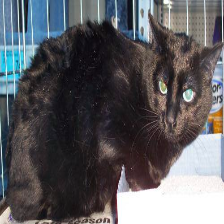

In [ ]:
cat_imgs[0]

In [ ]:
augmentor = generator.flow(cat_imgs[2:3])
# generates an iterator
# generator gets you with flow function, an augmentor,with gettig from you a pic

In [ ]:
import matplotlib.pyplot as plt

outpot of augmentor.next()[0] is float between
<br>0 to 255, but imshow takes [0...1]for floats
<br>and [0...255] for integer input for rgb to plot it

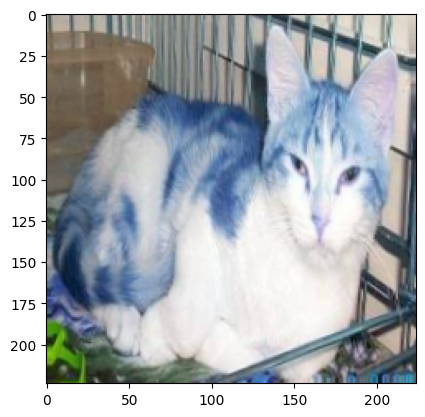

In [ ]:
plt.imshow(augmentor.next()[0].astype(np.uint8))
#8-bit unsigned integer

we can give data to augmentor with batch

after rotating it generates some new information for completing the picture,
<br>it causes  problem! it generates that with extra polatation algorithm.

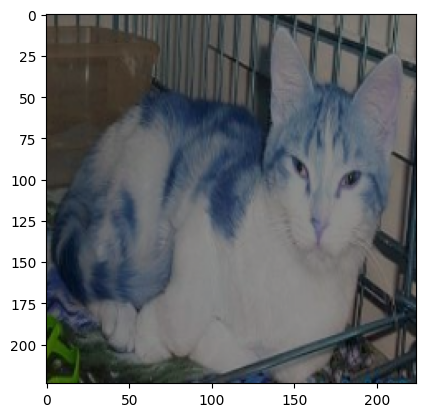

In [ ]:
generator = ImageDataGenerator(brightness_range=(0.1,0.7))
augmentor = generator.flow(cat_imgs[2:3])
plt.imshow(augmentor.next()[0].astype(np.uint8))

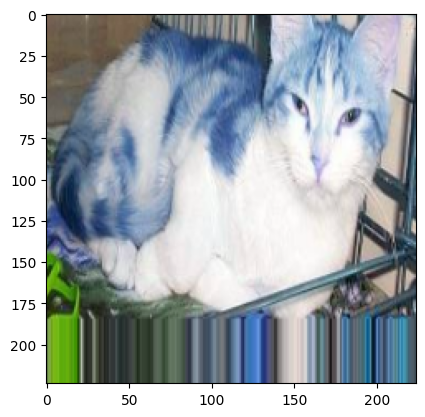

In [ ]:
generator = ImageDataGenerator(width_shift_range=0.2)
augmentor = generator.flow(cat_imgs[2:3])
plt.imshow(augmentor.next()[0].astype(np.uint8))

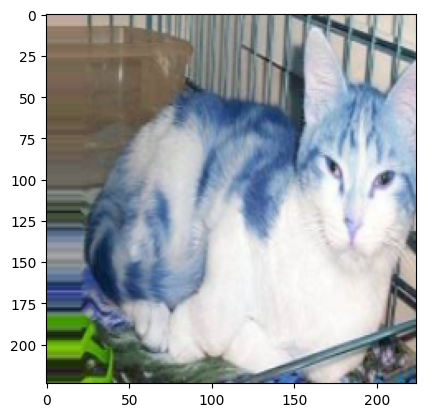

In [ ]:
generator = ImageDataGenerator(height_shift_range=0.2)
augmentor = generator.flow(cat_imgs[2:3])
plt.imshow(augmentor.next()[0].astype(np.uint8))

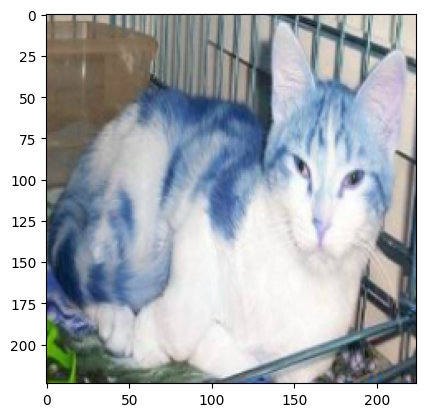

In [ ]:
generator = ImageDataGenerator(zoom_range=0.7)# make pictures with different perspectice
augmentor = generator.flow(cat_imgs[2:3])
plt.imshow(augmentor.next()[0].astype(np.uint8))

anomalies that generates here are noise

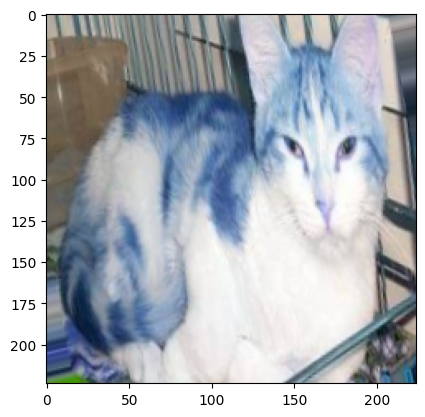

In [ ]:
generator = ImageDataGenerator(zoom_range=0.2, rotation_range=15, horizontal_flip=1)
augmentor = generator.flow(cat_imgs[2:3])
plt.imshow(augmentor.next()[0].astype(np.uint8))

In [ ]:
generator = ImageDataGenerator(rotation_range=15, horizontal_flip=0.5)
generator_single = ImageDataGenerator()

horizontal_flip  is probability, if you give 1, it flips all time,
<br>sometimes we dont want augmentation on training data give (),
<br> for test data:
<br>we want use ImageDataGenerator() to evaluate model
<br>to see if it has trained well,
<br>you can give it those noises that it doesnt seen before, and you dont trained it on it.<br>

---



In [ ]:
train_generator = generator.flow_from_directory(directory='/content/dataset/training_set/',
                              target_size=(224, 224), class_mode='categorical',
                              batch_size=16)

test_generator = generator_single.flow_from_directory(directory='/content/dataset/test_set/',
                              target_size=(224, 224), class_mode='categorical',
                              batch_size=16)

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


this function takes us directory and target_size for resizing, color_mode for black and withe or rgb,<br> classes for name of classes.class_mode= choose categorical for classification tasks.
<br> where does it find how many classes is taken?
<br> there is a rule for classification dataset, you must put each calss' data in one folder.

In [ ]:
data_aug = train_generator.next()

In [ ]:
len(data_aug[1])

16

look! it did itself all, the labels form is categorical

In [ ]:
data_aug[0].shape

(16, 224, 224, 3)

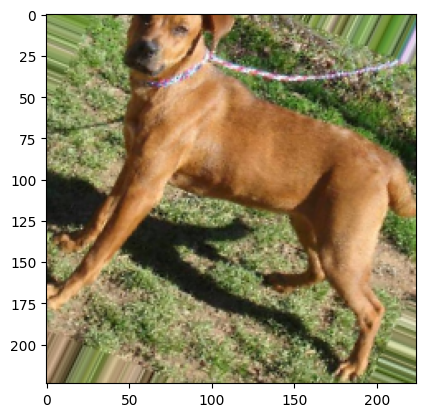

In [ ]:
plt.imshow(data_aug[0][0].astype(np.uint8))

there is a randomness choose in rotation_range from -25 to 25,
<br> zoom_range zero to 0.2, horizontal_flip has 0.5 probability to accur each time.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.applications import EfficientNetB0

In [ ]:
base_model = EfficientNetB0(weights=None, pooling='avg', include_top=False, input_shape=(224, 224, 3))

include_top=False eliminates the classification from the end too?no?

In [ ]:
base_model.summary()

In [ ]:
model = Sequential()
model.add(base_model)
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics= 'accuracy')

In [ ]:
model.fit(train_generator, epochs=5)

Epoch 1/5
422/500 [========================>.....] - ETA: 5:29 - loss: 0.6950 - accuracy: 0.5706

In [ ]:
model.evaluate(test_generator)

takes data in branches from disk...
<br>
aggresive augmentation is not good it can decreases accuracy


it made a pipeline without loading all data at once.
imagenet is 140gig, it can loaded on ram with 140 gig capacity,
LAION-5B dataset is 240tera there is no ram with this capacity.
speed of read on ram is 20g but on hard is 100m to 5g


#All of the classification is explained, you can classify whatever dataset you want.
we can use kaggles gpu
<br>
how we can get accuracy?
dont put weigths=None and use finetuning

## Fine Tunning :
we can freeze some layers or all.

In [ ]:
base_model = EfficientNetB0(weights=None, pooling='avg', include_top=False, input_shape=(224, 224, 3))
for layer in base_model:
  layer.trainable=False
model = Sequential()
model.add(base_model)
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics= 'accuracy')
model.fit(train_generator, epochs=5)
model.evaluate(test_generator)

In [ ]:
for layer in base_model:
  layer.trainable=True

#or
for layer in model:
  layer.trainable=True

decrease the learning rate

In [ ]:
optim = keras.optimizer.SGD(leaning_rate=1e-6)

then compile the model with new config.

In [ ]:
model.compile(optimizer=optim, loss='categorical_crossentropy', metrics= 'accuracy')

we know the base models parameters is good <br>
and it learned good features.
<br>but domain that trained is different with my domain
<br>it can be better,how?
<br>with too small changes with small learning rate,
<br>what you learned is ok but you can change too less to get better performance on this domain.
<br>if it be large your model will colapse

#Exercise:
Chest_X_Ray
<br>
https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia/data

train it then fine tune..